<a href="https://colab.research.google.com/github/AbbasSalami/ML_Tutorial/blob/main/ML_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
import random
import time
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Activation, Dropout, BatchNormalization, Flatten, Conv2D, Conv1D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model
from keras.utils import np_utils
from tensorflow.keras.datasets import mnist

# IRIS dataset (DT, SVM, MLP)

# MNIST dataset (SVM, MLP, CNN)

In [ ]:
# Visualise 10 images
def data_vis(input_data, L_idx):
  fig, ax = plt.subplots(1,10, figsize=(12,2))
  for i in L_idx:
    ax[i].imshow(input_data[i], cmap='gray')
    ax[i].set_xticks([])
    ax[i].set_yticks([])

def data_reshape(input_data):
  return input_data.reshape(input_data.shape[0], input_data.shape[1]*input_data.shape[2])

def show_shapes(*args):
  for item in args:
    print(item.shape)
  print("\n")

def one_hot(labels):
  return np_utils.to_categorical(labels, len(np.unique(labels)))


def training_vis(*args):
  fig, ax = plt.subplots(1,len(args), figsize=(12,4))
  for idx, item in enumerate(args):
    ax[idx].plot(100*np.array(item.history['accuracy']), label = "Train")
    ax[idx].plot(100*np.array(item.history['val_accuracy']), label = "Validation")
    ax[idx].legend(loc = "lower right")
    ax[idx].set_xlabel("Iterations")
    ax[idx].set_ylabel("Accuracy (%)")


def vis_misClass(model, input_test, label_test):
  L_wrong = []
  counter = 0
  if len(y_test_hot.shape) == 1:
    y_pred = model.predict(input_test)
  else:
    y_pred = np.argmax(model.predict(input_test),1)
  
  for i in range(len(y_pred)):
    if label_test[i] == y_pred[i]:
      counter += 1
    else:
      L_wrong.append(i)
      
  fig, ax = plt.subplots(1,10, figsize=(12,2))
  for i in L_wrong[:10]:
    ax[counter].imshow(x_test[i], cmap='gray')
    ax[counter].set_xticks([])
    ax[counter].set_yticks([])
    counter += 1


def vis_misClass(model, input_test, label_test, input_img):
  if len(label_test.shape) == 1:
    y_pred = model.predict(input_test)
  else:
    y_pred = np.argmax(model.predict(input_test),1)
    label_test = np.argmax(label_test,1)
  
  L_wrong = []
  counter = 0
  for i in range(len(y_pred)):
    if label_test[i] == y_pred[i]:
      counter += 1
    else:
      L_wrong.append(i)
      
  k = min(len(L_wrong), 10)
  L_wrong = random.sample(L_wrong, k)
  counter = 0
  fig, ax = plt.subplots(1,k, figsize=(12,2))
  for i in L_wrong:
    ax[counter].imshow(input_img[i], cmap='gray')
    ax[counter].set_xticks([])
    ax[counter].set_yticks([])
    counter += 1

(54000, 784)
(54000, 28, 28, 1)
(54000,)




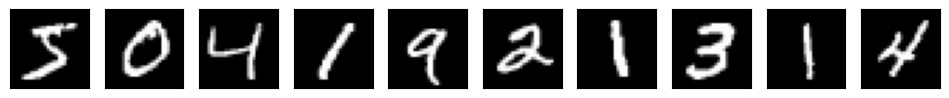

In [ ]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
data_vis(x_train, range(10))

# Select a subset of data
# x_train = x_train[:5000]
# y_train = y_train[:5000]
# x_test = x_test[:100]
# y_test = y_test[:100]

# Create train and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=42)

# Normalising our data points
x_train = x_train.astype('float32')/255
x_val = x_val.astype('float32')/255
x_test = x_test.astype('float32')/255

# Reshape images to train conventional ML algorithm and MLP
x_train_vec = data_reshape(x_train)
x_val_vec = data_reshape(x_val)
x_test_vec = data_reshape(x_test)

# Reshape images to train CNN
x_train_img = np.expand_dims(x_train, axis=3)
x_val_img = np.expand_dims(x_val, axis=3)
x_test_img = np.expand_dims(x_test, axis=3)

# Showing shape of our data
show_shapes(x_train_vec, x_train_img, y_train)

# One-hot encoding
y_train_hot = one_hot(y_train)
y_val_hot = one_hot(y_val)
y_test_hot = one_hot(y_test)

In [ ]:
# Initialising support vector machine 
model_svm = svm.SVC()

# Initialising multilayer perceptron
Input_block = Input(shape = (x_train_vec.shape[-1]))
out = Dense(512, activation = 'relu')(Input_block)
out = Dense(256, activation = 'relu')(out)
out = Dense(10, activation = 'softmax')(out)
model_MLP = Model(inputs = Input_block, outputs = out)

# Initialising convolutional neural network
Input_block = Input(shape = (x_train_img.shape[1:]))
out = Conv2D(32, kernel_size=(3, 3), activation='relu')(Input_block)
out = MaxPooling2D(pool_size=(2, 2))(out)
out = Flatten()(out)
out = Dense(128, activation='relu')(out)
out = Dropout(0.5)(out)
out = Dense(10, activation = 'softmax')(out)
model_CNN = Model(inputs = Input_block, outputs = out)


\MLP model

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_15 (Dense)            (None, 512)               401920    
                                                                 
 dense_16 (Dense)            (None, 256)               131328    
                                                                 
 dense_17 (Dense)            (None, 10)                2570      
                                                                 
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


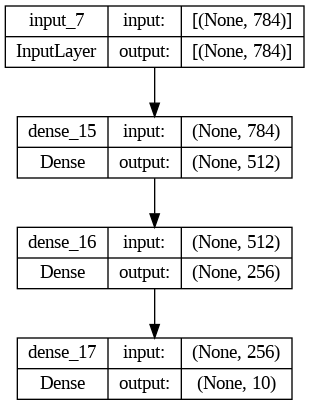

In [ ]:
# Visualise MLP architecture
print("\MLP model\n")
model_MLP.summary()
plot_model(model_MLP, show_shapes=True)


CNN model

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 5408)              0         
                                                                 
 dense_18 (Dense)            (None, 128)               692352    
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                               

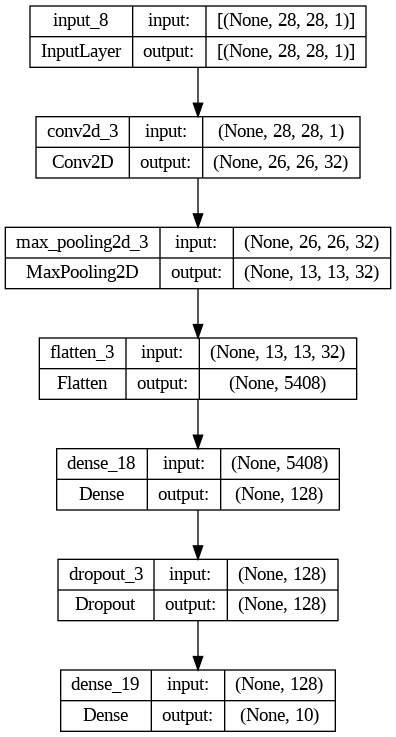

In [ ]:
# Visualise CNN architecture
print("\nCNN model\n")
model_CNN.summary()
plot_model(model_CNN, show_shapes=True)

In [ ]:
# Training SVM
print("Training a support vector machine ...")
model_svm.fit(x_train_vec, y_train)

Training a support vector machine ...


SVC()

In [ ]:
# Training MLP
print("Training a multilayer perceptron ...")
model_MLP.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
fittedModel_MLP = model_MLP.fit(x_train_vec, y_train_hot, batch_size = 32, epochs = 20, verbose = 1, validation_data=(x_val_vec, y_val_hot))

Training a multilayer perceptron ...
Epoch 1/20
1688/1688 [==============================] - 17s 10ms/step - loss: 0.1929 - accuracy: 0.9404 - val_loss: 0.1108 - val_accuracy: 0.9667
Epoch 2/20
1688/1688 [==============================] - 18s 11ms/step - loss: 0.0826 - accuracy: 0.9741 - val_loss: 0.0954 - val_accuracy: 0.9715
Epoch 3/20
1688/1688 [==============================] - 17s 10ms/step - loss: 0.0569 - accuracy: 0.9811 - val_loss: 0.0775 - val_accuracy: 0.9778
Epoch 4/20
1688/1688 [==============================] - 16s 10ms/step - loss: 0.0419 - accuracy: 0.9865 - val_loss: 0.0804 - val_accuracy: 0.9788
Epoch 5/20
1688/1688 [==============================] - 16s 10ms/step - loss: 0.0327 - accuracy: 0.9896 - val_loss: 0.0963 - val_accuracy: 0.9780
Epoch 6/20
1688/1688 [==============================] - 17s 10ms/step - loss: 0.0279 - accuracy: 0.9908 - val_loss: 0.0909 - val_accuracy: 0.9772
Epoch 7/20
 717/1688 [===========>..................] - ETA: 8s - loss: 0.0213 - accura

KeyboardInterrupt: ignored

In [ ]:
# Training CNN
print("Training a convolutional neural network ...")
model_CNN.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
fittedModel_CNN = model_CNN.fit(x_train_img, y_train_hot, batch_size = 32, epochs = 20, verbose = 1, validation_data=(x_val_img, y_val_hot))

Training a convolutional neural network ...
Epoch 1/20
1688/1688 [==============================] - 42s 24ms/step - loss: 0.2528 - accuracy: 0.9247 - val_loss: 0.0726 - val_accuracy: 0.9782
Epoch 2/20
1688/1688 [==============================] - 40s 24ms/step - loss: 0.1073 - accuracy: 0.9682 - val_loss: 0.0577 - val_accuracy: 0.9817
Epoch 3/20
1688/1688 [==============================] - 39s 23ms/step - loss: 0.0810 - accuracy: 0.9755 - val_loss: 0.0477 - val_accuracy: 0.9867
Epoch 4/20
1688/1688 [==============================] - 40s 24ms/step - loss: 0.0639 - accuracy: 0.9806 - val_loss: 0.0435 - val_accuracy: 0.9875
Epoch 5/20
1688/1688 [==============================] - 42s 25ms/step - loss: 0.0544 - accuracy: 0.9829 - val_loss: 0.0441 - val_accuracy: 0.9882
Epoch 6/20
1688/1688 [==============================] - 42s 25ms/step - loss: 0.0484 - accuracy: 0.9839 - val_loss: 0.0433 - val_accuracy: 0.9888
Epoch 7/20
1688/1688 [==============================] - 39s 23ms/step - loss: 0.

KeyboardInterrupt: ignored

In [ ]:
# Visualising the training process 
training_vis(fittedModel_MLP, fittedModel_CNN)

In [ ]:
# Evaluating models and comparison on the test data
score_svm = model_svm.score(x_test_vec, y_test)
score_MLP = model_MLP.evaluate(x_test_vec, y_test_hot, verbose=0)
score_CNN = model_CNN.evaluate(x_test_img, y_test_hot, verbose=0)

print("The SVM test accuracy:", round(score_svm*100,1), "%")
print("The MLP test accuracy:", round(score_MLP[1]*100,1), "%")
print("The CNN test accuracy:", round(score_CNN[1]*100,1), "%")

The SVM test accuracy: 97.8 %
The MLP test accuracy: 98.0 %
The CNN test accuracy: 98.7 %


In [ ]:
print("\nMisclassified samples by SVM\n")
vis_misClass(model_svm, x_test_vec, y_test, x_test)


Misclassified samples by SVM



KeyboardInterrupt: ignored


Misclassified samples by MLP

313/313 [==============================] - 1s 2ms/step


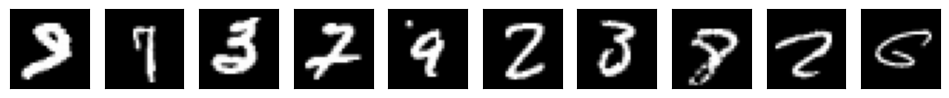

In [ ]:
print("\nMisclassified samples by MLP\n")
vis_misClass(model_MLP, x_test_vec, y_test_hot, x_test)


Misclassified samples by CNN

313/313 [==============================] - 2s 6ms/step


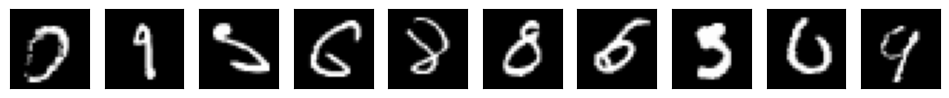

In [ ]:
print("\nMisclassified samples by CNN\n")
vis_misClass(model_CNN, x_test_img, y_test_hot, x_test)